# Imbalanced Dataset

Imagine, you have two categories in your dataset to predict - Category-A and category-B. When category A is higher than Category B or vice versa, you have a problem of imbalanced dataset

# SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is an over-sampling method. it creates synthetic samples of the minority class. Hence making the minority class equal to the majority class. SMOTE does this by selecting similar records and altering that record one column at a time by a random amount within the difference to the neighbouring records

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
url = 'https://raw.githubusercontent.com/Bhushan0130/Datasets/main/pima_indians_diabetes.csv'
df = pd.read_csv(url, header=0, names = range(0, 8))
df

,0,1,2,3,4,5,6,7
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
2,146,0,0,0,27.5,0.240,28,1
10,101,86,37,0,45.6,1.136,38,1
2,108,62,32,56,25.2,0.128,21,0
3,122,78,0,0,23.0,0.254,40,0


In [5]:
df.isnull().sum().sum()

0

In [9]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]
print(x.shape)
print(y.shape)

(273, 7)
(273,)


In [12]:
y.value_counts()

0    170
1    103
Name: 7, dtype: int64

<AxesSubplot:xlabel='7', ylabel='count'>

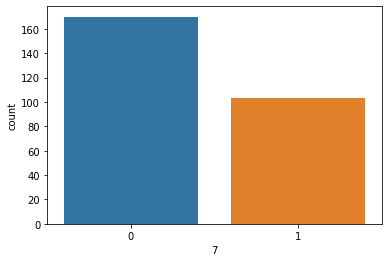

In [14]:
sns.countplot(y)

# Applying SMOTE

In [15]:
import sklearn
sklearn.__version__

'0.24.2'

In [16]:
# pip install imblearn
# pip install scikit-learn

In [7]:
# python / sklearn / numpy version required

In [17]:
import numpy 
numpy.__version__

'1.21.0'

In [18]:
# Imbalanced Learn is a python module that helps in balancing the datasets which are highly skewed or baised towards some classes.
# Thus, it helps in resampling the classes which are otherwise oversampled or undesampled. We need to install imbalanced learn

In [19]:
# ! pip install -U imbalanced-learn

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
smt = SMOTE()

In [22]:
new_x, new_y  = smt.fit_resample(x, y)

In [25]:
# new_x.value_counts()
new_y.value_counts()

0    170
1    170
Name: 7, dtype: int64

<AxesSubplot:xlabel='7', ylabel='count'>

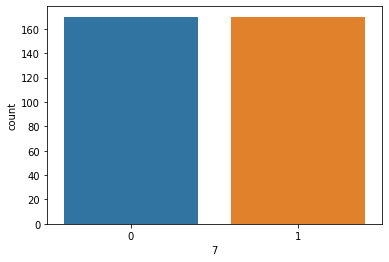

In [26]:
sns.countplot(new_y)

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.30, random_state = 42)
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape' ,x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (191, 7)
y_train shape (191,)
x_test shape (82, 7)
y_test shape (82,)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
logistic_pred = logistic.predict(x_test)

In [41]:
print(round(accuracy_score(y_test,logistic_pred), 4 ))
print(classification_report(y_test,logistic_pred ))
print(confusion_matrix(y_test,logistic_pred))

0.7683
              precision    recall  f1-score   support

           0       0.75      0.92      0.82        48
           1       0.83      0.56      0.67        34

    accuracy                           0.77        82
   macro avg       0.79      0.74      0.74        82
weighted avg       0.78      0.77      0.76        82

[[44  4]
 [15 19]]


In [43]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/iris.csv')
iris_df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [47]:
iris_df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

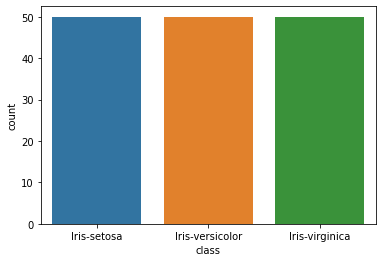

In [48]:
sns.countplot(iris_df['class'])

In [50]:
wine_df = pd.read_csv('https://raw.githubusercontent.com/Bhushan0130/Datasets/main/winequality-red.csv')
wine_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [51]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [52]:
x = wine_df.iloc[:,:-1]
x.shape

(1599, 11)

In [53]:
y = wine_df.iloc[:,-1]
y.shape

(1599,)

In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [58]:
x, y = sm.fit_resample(x,y)

In [59]:
y.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

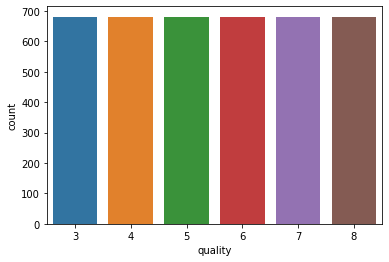

In [60]:
sns.countplot(y)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.30, random_state = 45)
print('x_train', x_train.shape)
print('y_train', y_train.shape)

print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (2860, 11)
y_train (2860,)
x_test (1226, 11)
y_test (1226,)


In [65]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train )
dtc_pred = dtc.predict(x_test)

In [66]:
accuracy_score(dtc_pred, y_test)

0.7814029363784666